# Wish Product Rating Prediction

## Introduction

This dataset comes from wish.com and this is an American online E-commerce platform for transactions between sellers and buyers.

We have some features collected by their rating and based on this information we need to predict the rating of a new product.

## Problem Formulation

###Define the problem. What is the input? What is the output?
The problem is to predict the product ratings of Wish.com products based on other features of the products. The input is the various features of the products such as product type, description, price, and image, among others. The output is the predicted product rating, which is in categories from 1 to 5. The goal is to estimate how likely people will like a product and understand the conditions under which a product will be highly rated.

###What data mining function is required?
The data mining function required is classification since the goal is to predict the product rating which is discrete, based on other features of the product.

###What could be the challenges?
The challenges could include dealing with noisy data, missing values, and irrelevant or unnecessary features. Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering.

###What is the impact?
The impact of accurately predicting the product rating is that it can help businesses understand their customer base and tailor their products to meet customer preferences. It can also help businesses identify the features that are most important to customers, which can inform product development and marketing strategies.

###What is an ideal solution?
For Me Decision Tree Was the best model for this problem.
but in general, An ideal solution would be to develop a machine learning model that accurately predicts the product rating based on the available features, while also being able to handle missing or noisy data. The model should also be easily interpretable, so that businesses can understand the factors that are most important for predicting product ratings. Additionally, the model should be regularly updated with new data to ensure its accuracy over time.


# Answering the questions

✔️ Answer the questions below (briefly):

🌈 Why Data Mining is a misnomer? What is another preferred name?


*   is a misnomer because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself.

*   another preferred name is KDD(knowledge discovery in databases)

🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?



1.   
*   (KDD) refers to the general process of extracting usable information from data.

*   it is a multi-step process involving data preparation, pattern searching, knowledge evaluation, and refinement with iteration after modification.

*   it refers to the overall process of discovering useful knowledge from data. It involves the evaluation and possibly interpretation of the patterns to make the decision of what qualifies as knowledge. It also includes the choice of encoding schemes, preprocessing, sampling, and projections of the data prior to the data mining step.

2.   Data Engineers are involved in building the infrastructure and architecture for data generation, Data Scientists are mainly concerned with performing advanced mathematics and statistical analysis on the collected data.



🌈 In data mining, what is the difference between prediction and categorization?


*   categorization models predict categorical class labels; and prediction models predict continuous valued functions. 


🌈 Why data science/machine learning is a bad idea in the context of information security?


*   Machine learning was not designed with security in mind and as such is prone to adversarial manipulation and reverse engineering. While most data based learning models rely on a static assumption of the world, the security landscape is one that is especially dynamic, with an ongoing never ending arms race between the system designer and the attackers.


🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?



*   The CIA triad refers to an information security model made up of the three main components: confidentiality, integrity and availability


*   use it to access the security by Apply CIA to Data flow





#Importing Libraries and check data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
#Load Data
df_train= pd.read_csv("/content/train_new.csv")
df_train.head(3)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.0,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.0,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.0,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940


In [3]:
df_test= pd.read_csv("/content/test_new.csv")
df_test.head(3)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308


Check the Shape of the training and test Data

In [4]:
df_train.shape

(1094, 34)

In [5]:
df_test.shape

(479, 33)

# Part 1: Data Preprocessing

In [6]:
# Checking the target Column
df_train[['rating']].value_counts()

rating
4.0       774
5.0       170
3.0       135
2.0        12
1.0         2
6.0         1
dtype: int64

In [7]:
# Removing the wrong rating (6)
df_train = df_train[df_train["rating"] != 6]

<Axes: xlabel='count', ylabel='rating'>

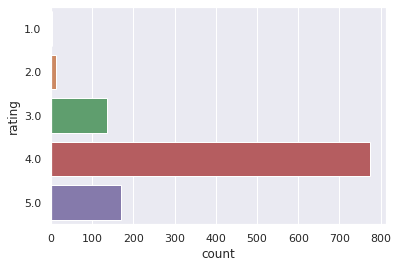

In [8]:
sns.countplot(y="rating", data=df_train)

In [9]:
# Dropping the irrelavent coulmns
df_train.drop(columns=["merchant_info_subtitle", "merchant_title", "tags" ,"currency_buyer", "theme",  "merchant_id", "merchant_name", "inventory_total", "merchant_profile_picture", "crawl_month", "id"],axis=1, inplace = True)
df_test.drop(columns=["merchant_info_subtitle", "merchant_title", "tags" ,"currency_buyer", "theme",  "merchant_id", "merchant_name", "inventory_total", "merchant_profile_picture", "crawl_month", "id"],axis=1, inplace = True)

In [10]:
# Checking The Null values
df_train.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
has_urgency_banner              744
urgency_text                    744
origin_country                   12
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
dtype: int64

In [11]:
df_test.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
dtype: int64

In [12]:
df_train['has_urgency_banner'].unique()

array([nan,  1.])

In [13]:
# nan here has a meaning and not a missing value so we will replace it
df_train['has_urgency_banner'] = df_train['has_urgency_banner'].fillna(0).astype('int32')

In [14]:
df_test['has_urgency_banner'] = df_test['has_urgency_banner'].fillna(0).astype('int32')

In [15]:
df_train['urgency_text'].unique()

array([nan, 'Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [16]:
# Same here, nan has a meaning
df_train['urgency_text'] = df_train['urgency_text'].fillna("None")

In [17]:
# I got an error later when using One hot encoding because the number of the unique values will be diffrent from the training data so tied to solve it here 
df_test['urgency_text'].iloc[0] = "Réduction sur les achats en gros"

In [18]:
df_test['urgency_text'] = df_test['urgency_text'].fillna("None")

In [19]:
# Drop the remaining Nulls
df_train.dropna(inplace = True)

In [20]:
# df_test.dropna(inplace = True)

In [21]:
df_train.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
has_urgency_banner              0
urgency_text                    0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [22]:
df_test.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   12
product_variation_size_id        2
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
has_urgency_banner               0
urgency_text                     0
origin_country                   5
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [23]:
df_train.shape

(1041, 23)

In [24]:
df_test.shape

(479, 22)

Text(0.5, 1.0, 'Correlation Matrix')

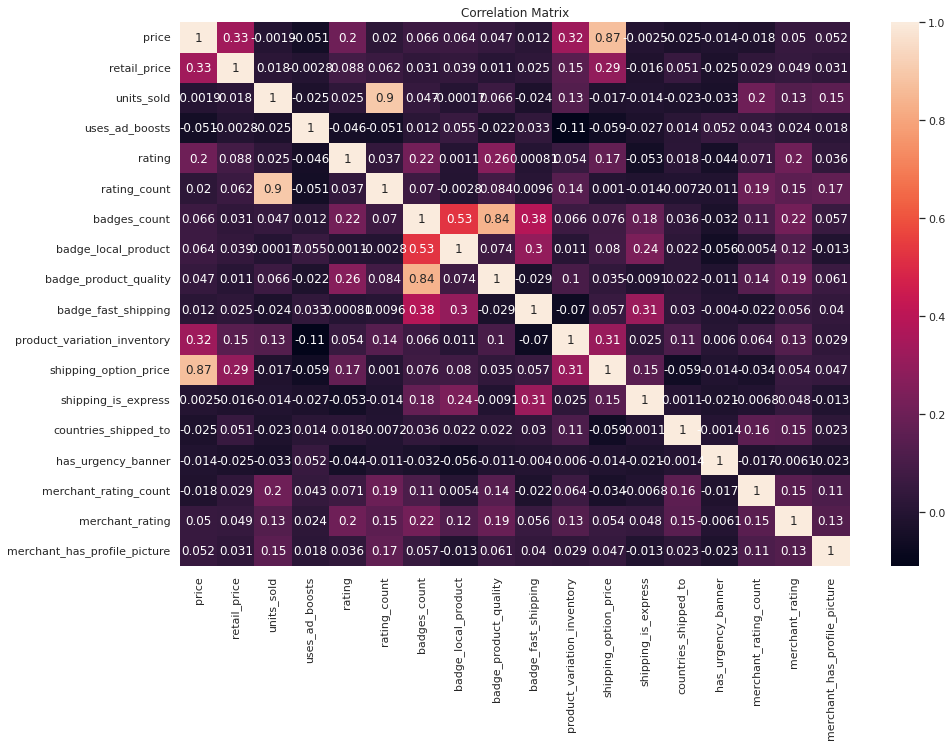

In [25]:
# Checking the correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot =True)
plt.title('Correlation Matrix')

## Rare Labels

In [26]:
# Let's look at the different number of labels in each variable.
# These are the categorical variables.
cat_cols = ['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country', ]
for col in cat_cols:
    print('variable: ', col, ' number of labels: ', df_train[col].nunique())
print('total Products: ', len(df_train))

variable:  product_color  number of labels:  85
variable:  product_variation_size_id  number of labels:  72
variable:  shipping_option_name  number of labels:  13
variable:  origin_country  number of labels:  5
total Products:  1041


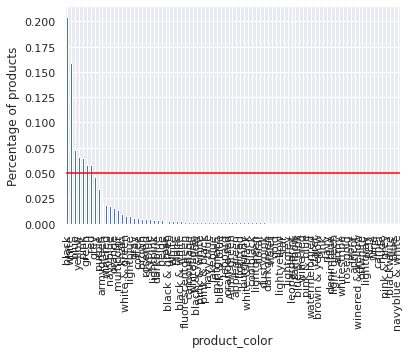

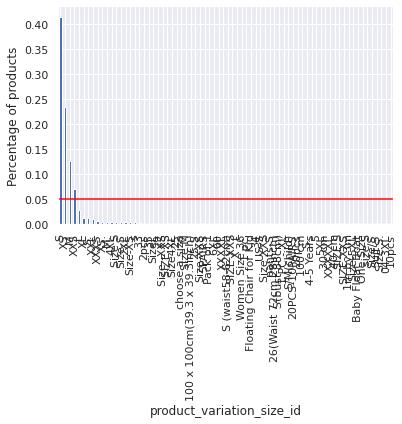

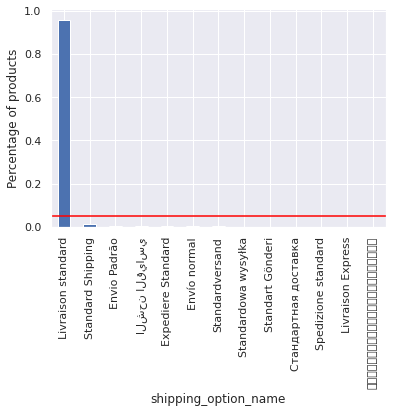

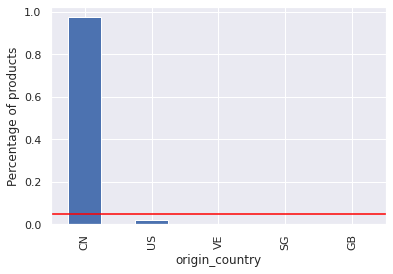

In [27]:
# Let's plot the category frequency. That is, the percentage of product with each label.

total_products = len(df_train)

# For each categorical variable
for col in cat_cols:

    # Count the number of houses per category and divide by total houses.
    # That is, the percentage of houses per category.

    temp_df = pd.Series(df_train[col].value_counts() / total_products)

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of products')
    plt.show()

### Grouping Rare Labels

We can handle rare values by grouping them under an umbrella category called 'Rare' or 'Other'

In [28]:
# replace all labels that appear in less than 5% of the products by the label 'rare'.

def group_rare_labels(df, var):

    total_houses = len(df)

    # First, I calculate the % of products per category.
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # Then, I create a dictionary to replace the rare labels with the
    # string 'rare' (for categories present in less than 5% of products).

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # Now, I replace the rare categories.
    tmp = df[var].map(grouping_dict)

    return tmp

In [29]:
# ['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country', ]

df_train['product_color_grouped'] = group_rare_labels(df_train, 'product_color')
df_test['product_color_grouped'] = group_rare_labels(df_test, 'product_color')

In [30]:
# Checking the results
df_train[['product_color', 'product_color_grouped']].head()

,product_color,product_color_grouped
0,yellow,yellow
1,black,black
2,white,white
3,lakeblue,rare
4,apricot,rare


In [31]:
df_train["product_color_grouped"].unique()

array(['yellow', 'black', 'white', 'rare', 'blue', 'red', 'green', 'pink'],
      dtype=object)

In [32]:
df_test["product_color_grouped"].unique()

array(['white', 'black', 'rare', 'yellow', nan, 'green', 'pink', 'red'],
      dtype=object)

In [33]:
# Do for the rest
df_train['product_variation_size_id_grouped'] = group_rare_labels(df_train, 'product_variation_size_id')
df_train['shipping_option_name_grouped'] = group_rare_labels(df_train, 'shipping_option_name')
df_train['origin_country_grouped'] = group_rare_labels(df_train, 'origin_country')
df_test['product_variation_size_id_grouped'] = group_rare_labels(df_test, 'product_variation_size_id')
df_test['shipping_option_name_grouped'] = group_rare_labels(df_test, 'shipping_option_name')
df_test['origin_country_grouped'] = group_rare_labels(df_test, 'origin_country')

In [34]:
# Then we drop the orginal columns as we don't need it anymore
df_train = df_train.drop(columns=['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country'],axis=1)
df_test = df_test.drop(columns=['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country'],axis=1)

In [35]:
# Fill The NA for later
df_train['product_color_grouped'] = df_train['product_color_grouped'].fillna("rare")
df_test['product_color_grouped'] = df_test['product_color_grouped'].fillna("blue")
df_train['product_variation_size_id_grouped'] = df_train['product_variation_size_id_grouped'].fillna("rare")
df_test['product_variation_size_id_grouped'] = df_test['product_variation_size_id_grouped'].fillna("rare")
df_train['shipping_option_name_grouped'] = df_train['shipping_option_name_grouped'].fillna("rare")
df_test['shipping_option_name_grouped'] = df_test['shipping_option_name_grouped'].fillna("rare")
df_train['origin_country_grouped'] = df_train['origin_country_grouped'].fillna("rare")
df_test['origin_country_grouped'] = df_test['origin_country_grouped'].fillna("rare")

In [36]:
# We use get_dummies to One hode Encode the data
df_train = pd.get_dummies(df_train)   
df_test = pd.get_dummies(df_test) 

In [37]:
# Train Test Split
y_tr = df_train['rating']
X_tr = df_train.drop(columns = ['rating'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=44)
print(X_train.shape)
print(X_test.shape)

(832, 37)
(209, 37)


#Part 2: Building The Models

## Hyperparameters Optimization

In [38]:
# Here we predefine the different hyperParameters to check the best fit later
models_names = [
         "Naive Bayes",
         "Decision Trees",
         "Support Vector Machines"
        ]
modelNB = ComplementNB()
modelDT = DecisionTreeClassifier(random_state=44)
modelSVC = SVC(probability=True, random_state=44)

# Naive Bayes
param1 = {}
param1['alpha'] = [10**-2, 10**-1, 10**3]

param4 = {}
param4['alpha'] = [10**0, 10**1, 10**2]

# DecisionTreeClassifier
param2 = {}
param2['max_depth'] = [10,15,20,25]
param2['min_samples_split'] = [7,9,15]

param5 = {}
param5['max_depth'] = [2,5,10,25]
param5['min_samples_split'] = [2,5,15]

# Support Vector Machine
param3 = {}
param3['C'] = [10**-4, 10**-3, 10**-2, 10**-1, 10**3]
param3['kernel'] = ['poly','rbf', 'sigmoid']

param6 = {}
param6['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param6['kernel'] = ['poly','rbf', 'sigmoid']

##Naive Bayes

In [39]:
# Here we get the best possible parameters to use 
gs_nb = GridSearchCV(modelNB, param4, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Naive Bayes",gs_nb.best_params_)

Best parameter for Naive Bayes {'alpha': 1}


In [40]:
# Predict the target column
y_pred = gs_nb.predict(X_test)

In [41]:
# Printing the accuracy
print(f"Classification report for Naive Bayes\n with best parameters{gs_nb.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Naive Bayes
 with best parameters{'alpha': 1}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5
         3.0       0.20      0.07      0.11        27
         4.0       0.76      0.61      0.67       140
         5.0       0.20      0.49      0.28        35

    accuracy                           0.50       209
   macro avg       0.23      0.23      0.21       209
weighted avg       0.57      0.50      0.51       209



**We see here that the Naive Bayes model isn't the best option which gives 50% Accuracy even with the best parameters given**

## Decision Tree

In [42]:
# Here we get the best possible parameters to use 
gs_dt = GridSearchCV(modelDT, param5, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Decision Trees", gs_dt.best_params_)

Best parameter for Decision Trees {'max_depth': 2, 'min_samples_split': 2}


In [43]:
# Predict the target column
y_pred = gs_dt.predict(X_test)

In [44]:
# Printing the accuracy
print(f"Classification report for Decision Tree\n with best parameters{gs_dt.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Decision Tree
 with best parameters{'max_depth': 2, 'min_samples_split': 2}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        27
         4.0       0.77      0.96      0.86       140
         5.0       0.53      0.54      0.54        35

    accuracy                           0.73       209
   macro avg       0.26      0.30      0.28       209
weighted avg       0.61      0.73      0.66       209



**We see here that the Decision Tree model had the best accuracy whith accuracy more thab 73% with the best parameters given**

## Support Vector Machines (SVM)

In [45]:
# Here we get the best possible parameters to use 
gs_sv = GridSearchCV(modelSVC, param6, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for SVM", gs_sv.best_params_)

Best parameter for SVM {'C': 0.01, 'kernel': 'poly'}


In [46]:
# Predict the target column
y_pred = gs_sv.predict(X_test)

In [47]:
# Printing the accuracy
print(f"Classification report for Support Vector Machines\n with best parameters{gs_sv.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Support Vector Machines
 with best parameters{'C': 0.01, 'kernel': 'poly'}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        27
         4.0       0.67      1.00      0.80       140
         5.0       0.00      0.00      0.00        35

    accuracy                           0.67       209
   macro avg       0.13      0.20      0.16       209
weighted avg       0.45      0.67      0.54       209



**Here the accuracy is better than Naive Bayes but still lower than DT so we will take the DT as our main model**

# Part 3: Trying the Test Data

## Naive Bayes Model

In [48]:
#Predecting the Rating for the test data
y_pred1 = gs_nb.predict(df_test)

In [49]:
#We save the result in a csv file for the submission
prediction = pd.DataFrame(y_pred1, columns=['rating']).to_csv('NB_submission.csv',index=False)
df = pd.read_csv('NB_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('NB_submission.csv',index=False)

## Decision Tree Model

In [50]:
#Predecting the Rating for the test data
y_pred2 = gs_dt.predict(df_test)

In [51]:
#We save the result in a csv file for the submission
prediction = pd.DataFrame(y_pred2, columns=['rating']).to_csv('DT_submission.csv',index=False)
df = pd.read_csv('DT_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('DT_submission.csv',index=False)

## Support Vector Machine

In [52]:
#Predecting the Rating for the test data
y_pred3 = gs_sv.predict(df_test)

In [53]:
#We save the result in a csv file for the submission
prediction = pd.DataFrame(y_pred3, columns=['rating']).to_csv('SVM_submission.csv',index=False)
df = pd.read_csv ('SVM_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('SVM_submission.csv',index=False)

# Part 4: Trials Done, and Trying another HyperParameters for the models and check the accuracy

## Naive Bayes 

In [54]:
# Here we get the best possible parameters to use 
gs_nb = GridSearchCV(modelNB, param1, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Naive Bayes",gs_nb.best_params_)

Best parameter for Naive Bayes {'alpha': 0.01}


In [55]:
# Predict the target column
y_pred = gs_nb.predict(X_test)

In [56]:
# Printing the accuracy
print(f"Classification report for Naive Bayes\n with best parameters{gs_nb.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Naive Bayes
 with best parameters{'alpha': 0.01}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5
         3.0       0.20      0.07      0.11        27
         4.0       0.76      0.61      0.67       140
         5.0       0.20      0.49      0.28        35

    accuracy                           0.50       209
   macro avg       0.23      0.23      0.21       209
weighted avg       0.57      0.50      0.51       209



##Decision Tree

In [57]:
# Here we get the best possible parameters to use 
gs_dt = GridSearchCV(modelDT, param2, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for Decision Trees", gs_dt.best_params_)

Best parameter for Decision Trees {'max_depth': 10, 'min_samples_split': 7}


In [58]:
# Predict the target column
y_pred = gs_dt.predict(X_test)

In [59]:
# Printing the accuracy
print(f"Classification report for Decision Tree\n with best parameters{gs_dt.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Decision Tree
 with best parameters{'max_depth': 10, 'min_samples_split': 7}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.40      0.40      0.40         5
         3.0       0.29      0.30      0.29        27
         4.0       0.80      0.83      0.81       140
         5.0       0.65      0.57      0.61        35

    accuracy                           0.70       209
   macro avg       0.43      0.42      0.42       209
weighted avg       0.69      0.70      0.69       209



## SVM

In [60]:
# Here we get the best possible parameters to use 
gs_sv = GridSearchCV(modelSVC, param3, cv=3, scoring='roc_auc').fit(X_train, y_train)
print("Best parameter for SVM", gs_sv.best_params_)

Best parameter for SVM {'C': 0.0001, 'kernel': 'poly'}


In [61]:
# Predict the target column
y_pred = gs_sv.predict(X_test)

In [62]:
# Printing the accuracy
print(f"Classification report for Support Vector Machines\n with best parameters{gs_sv.best_params_}\n")
print(classification_report(y_test,y_pred))

Classification report for Support Vector Machines
 with best parameters{'C': 0.0001, 'kernel': 'poly'}

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        27
         4.0       0.67      1.00      0.80       140
         5.0       0.00      0.00      0.00        35

    accuracy                           0.67       209
   macro avg       0.13      0.20      0.16       209
weighted avg       0.45      0.67      0.54       209

